In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import pandas as pd
import numpy as np

Content = pd.read_csv('/content/drive/MyDrive/Accenture/Content.csv')
ReactionTypes = pd.read_csv('/content/drive/MyDrive/Accenture/ReactionTypes.csv')
Reaction =pd.read_csv('/content/drive/MyDrive/Accenture/Reactions.csv')


In [50]:
print(Content.head())

   Unnamed: 0                            Content ID   Type        Category
0           0  97522e57-d9ab-4bd6-97bf-c24d952602d2  photo        Studying
1           1  9f737e0a-3cdd-4d29-9d24-753f4e3be810  photo  healthy eating
2           2  230c4e4d-70c3-461d-b42c-ec09396efb3f  photo  healthy eating
3           3  356fff80-da4d-4785-9f43-bc1261031dc6  photo      technology
4           4  01ab84dd-6364-4236-abbb-3f237db77180  video            food


In [51]:
Content = Content.dropna()
ReactionTypes = ReactionTypes.dropna()
Reaction = Reaction.dropna()

In [52]:
missing_Content = pd.DataFrame({'Percent Missing ': (Content.isnull().sum()*100/len(Content))})
print(missing_Content)

            Percent Missing 
Unnamed: 0               0.0
Content ID               0.0
Type                     0.0
Category                 0.0


In [53]:
missing_ReactionTypes = pd.DataFrame({'Missing Percent' : (ReactionTypes.isnull().sum()*100/len(ReactionTypes))})
print(missing_ReactionTypes)

            Missing Percent
Unnamed: 0              0.0
Type                    0.0
Sentiment               0.0
Score                   0.0


In [55]:
missing_Reactions = pd.DataFrame({'Missing Percent' : (Reaction.isnull().sum()*100/len(Reaction))})
print(missing_Reactions)

            Missing Percent
Unnamed: 0              0.0
Content ID              0.0
Type                    0.0
Datetime                0.0


In [56]:
print(Content.dtypes.to_string())

Unnamed: 0     int64
Content ID    object
Type          object
Category      object


In [57]:
print(Reaction.dtypes.to_string())

Unnamed: 0     int64
Content ID    object
Type          object
Datetime      object


In [58]:
print(ReactionTypes.dtypes.to_string())

Unnamed: 0     int64
Type          object
Sentiment     object
Score          int64


In [62]:
New_merged = pd.merge(Reaction, Content, left_on= 'Content ID', right_on= 'Content ID', how = 'inner')
print(New_merged.head())

   Unnamed: 0_x                            Content ID      Type_x  \
0             1  97522e57-d9ab-4bd6-97bf-c24d952602d2     disgust   
1             2  97522e57-d9ab-4bd6-97bf-c24d952602d2     dislike   
2             3  97522e57-d9ab-4bd6-97bf-c24d952602d2      scared   
3             4  97522e57-d9ab-4bd6-97bf-c24d952602d2     disgust   
4             5  97522e57-d9ab-4bd6-97bf-c24d952602d2  interested   

          Datetime  Unnamed: 0_y Type_y  Category  
0   11/7/2020 9:43             0  photo  Studying  
1  6/17/2021 12:22             0  photo  Studying  
2   4/18/2021 5:13             0  photo  Studying  
3   1/6/2021 19:13             0  photo  Studying  
4  8/23/2020 12:25             0  photo  Studying  


In [63]:
New_merged = pd.merge(New_merged,ReactionTypes, left_on= 'Type_x', right_on='Type', how = 'inner')
print(New_merged.head())

   Unnamed: 0_x                            Content ID   Type_x  \
0             1  97522e57-d9ab-4bd6-97bf-c24d952602d2  disgust   
1             4  97522e57-d9ab-4bd6-97bf-c24d952602d2  disgust   
2            35  97522e57-d9ab-4bd6-97bf-c24d952602d2  disgust   
3            52  9f737e0a-3cdd-4d29-9d24-753f4e3be810  disgust   
4            88  230c4e4d-70c3-461d-b42c-ec09396efb3f  disgust   

          Datetime  Unnamed: 0_y Type_y        Category  Unnamed: 0     Type  \
0   11/7/2020 9:43             0  photo        Studying           2  disgust   
1   1/6/2021 19:13             0  photo        Studying           2  disgust   
2    4/9/2021 2:46             0  photo        Studying           2  disgust   
3  3/28/2021 21:15             1  photo  healthy eating           2  disgust   
4    8/4/2020 5:40             2  photo  healthy eating           2  disgust   

  Sentiment  Score  
0  negative      0  
1  negative      0  
2  negative      0  
3  negative      0  
4  negative      

In [66]:
New_merged['Category'] = New_merged['Category'].astype(object)
New_merged['Category'] = New_merged['Category'].str.lower()
print(New_merged['Category'].dtype)

object


In [70]:
New_merged['Category']  = New_merged['Category'] .str.replace(r'"', '')

In [72]:
outputfile2 = 'Newmerged_data.xlsx'
New_merged.to_excel(outputfile2,index = False)

In [71]:
TotalScores = New_merged.groupby('Category')['Score'].sum()
sorted_scores = TotalScores.sort_values(ascending=False)
print(sorted_scores)

Category
animals            74965
science            71168
healthy eating     69339
technology         68738
food               66676
culture            66579
travel             64880
cooking            64756
soccer             57783
education          57436
fitness            55323
studying           54269
dogs               52511
tennis             50339
veganism           49619
public speaking    49264
Name: Score, dtype: int64


In [ ]:
Top_Categories = TotalScores.nlargest(5).index.tolist()
merged_df['Top 5 Categories'] = merged_df['Category'].apply(lambda x: x if x in Top_Categories)
print(merged_df)

SyntaxError: expected 'else' after 'if' expression (<ipython-input-21-02e4d471830d>, line 2)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Dataset = pd.read_csv('/content/drive/MyDrive/Accenture/Task 3_Final Content Data set.csv')

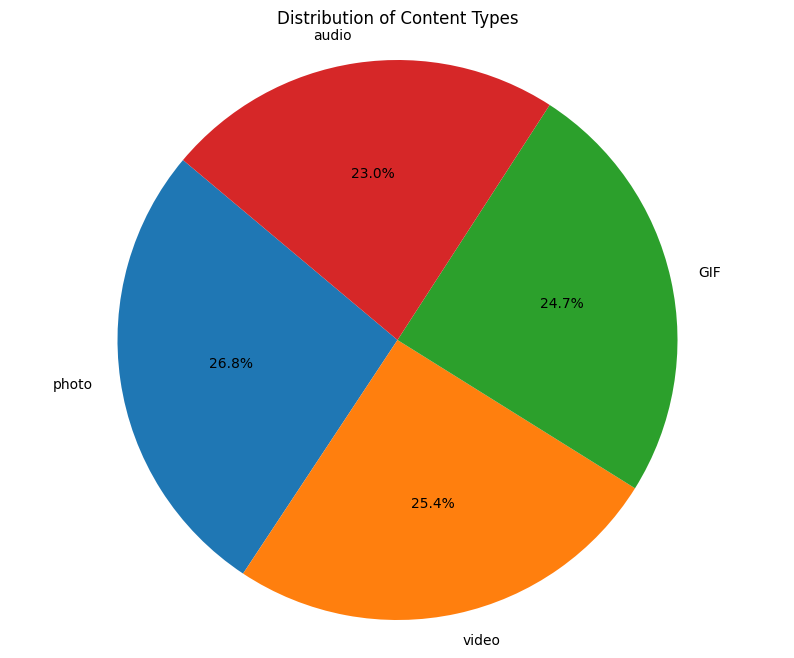

In [6]:
ContentCounts = Dataset['Content Type'].value_counts()
plt.figure(figsize=(10,8))
plt.pie(ContentCounts, labels=ContentCounts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Content Types')
plt.axis('equal')
plt.show()

<Figure size 2000x1800 with 0 Axes>

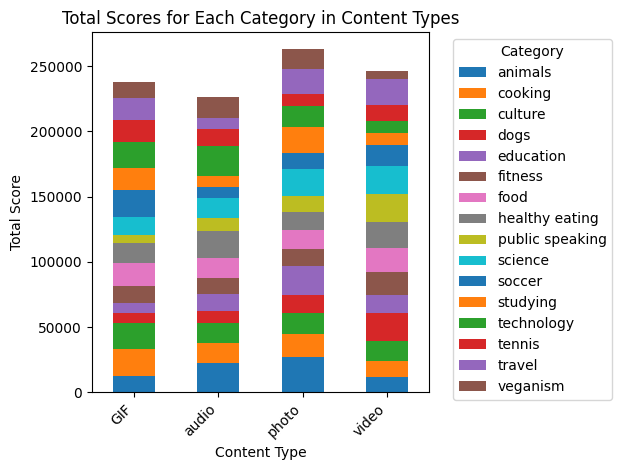

In [12]:
content_category_scores = Dataset.groupby(['Content Type', 'Category'])['Score'].sum().unstack()
colors = ['skyblue', 'orange', 'lightgreen', 'salmon', 'lightblue']

plt.figure(figsize=(20, 18))
content_category_scores.plot(kind='bar', stacked=True)
plt.title('Total Scores for Each Category in Content Types')
plt.xlabel('Content Type')
plt.ylabel('Total Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

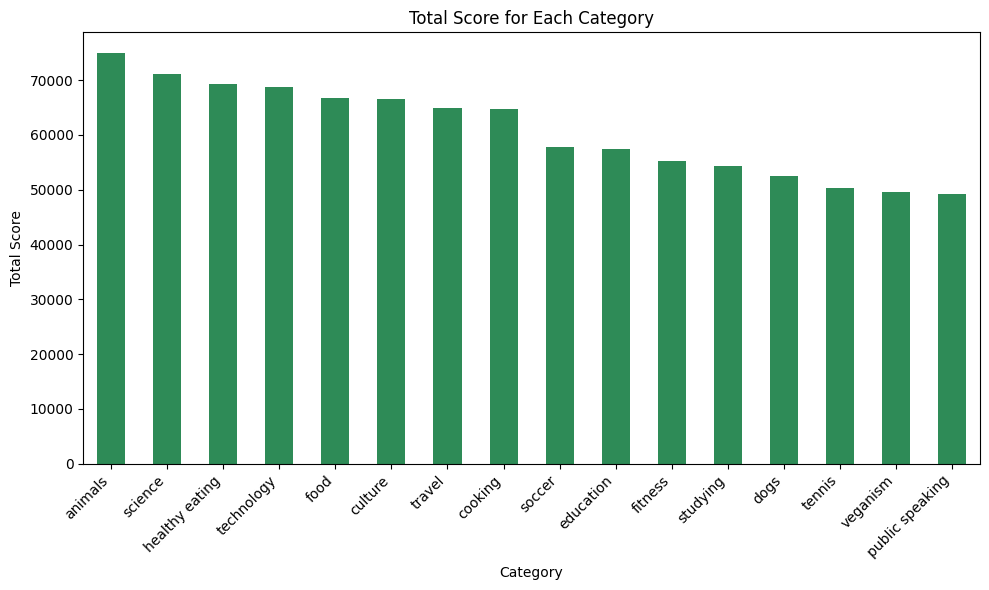

In [13]:
category_scores = Dataset.groupby('Category')['Score'].sum()
category_scores_sorted = category_scores.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
category_scores_sorted.plot(kind='bar', color='seagreen')
plt.title('Total Score for Each Category')
plt.xlabel('Category')
plt.ylabel('Total Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

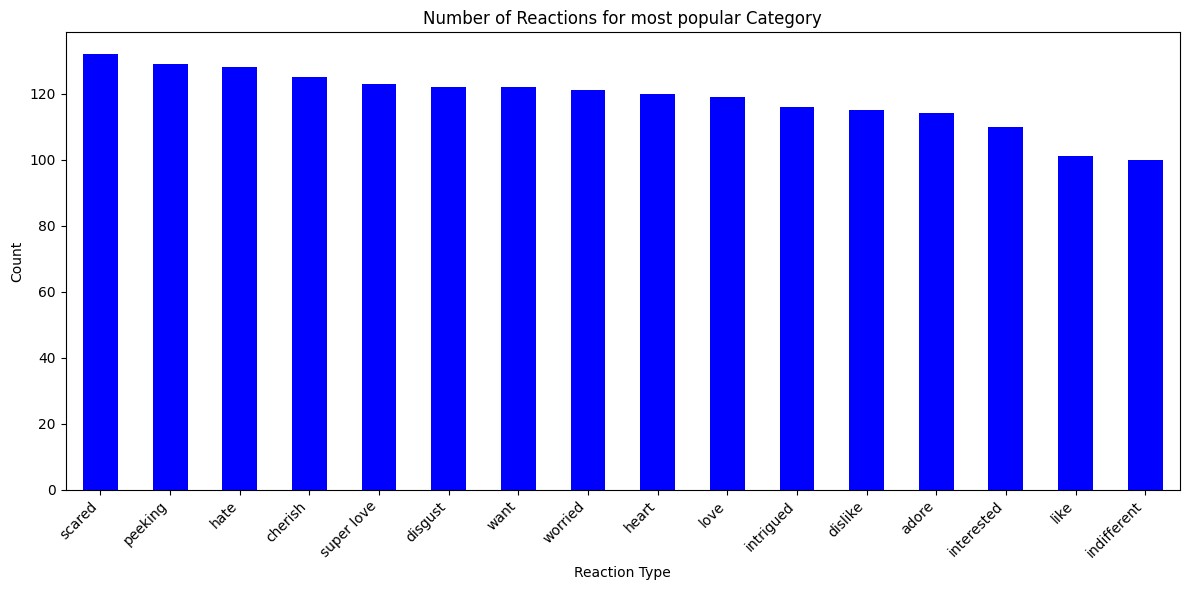

In [14]:
category_a_df = Dataset[Dataset['Category'] == 'animals']
reaction_counts_category_a = category_a_df.groupby('Reaction Type').size()
reaction_counts_category_a = reaction_counts_category_a.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
reaction_counts_category_a.plot(kind='bar', color='blue')
plt.title('Number of Reactions for most popular Category')
plt.xlabel('Reaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 2000x1800 with 0 Axes>

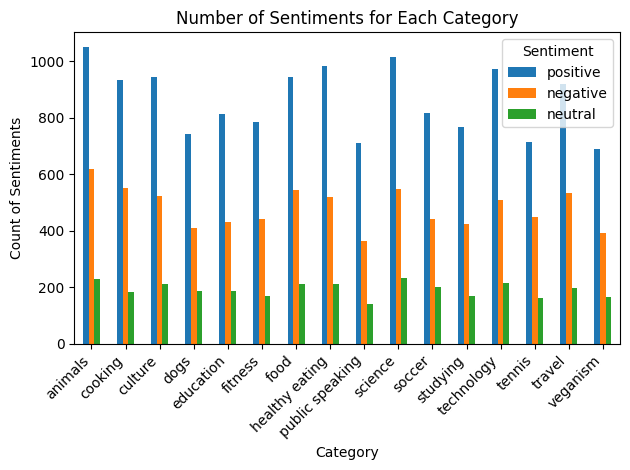

In [87]:
category_sentiment_counts = Dataset.groupby(['Category', 'Sentiment']).size().unstack(fill_value=0)
category_sentiment_counts = category_sentiment_counts.apply(lambda x: x.sort_values(ascending=False), axis=1)

plt.figure(figsize=(20, 18))
category_sentiment_counts.plot(kind='bar')
plt.title('Number of Sentiments for Each Category')
plt.xlabel('Category')
plt.ylabel('Count of Sentiments')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

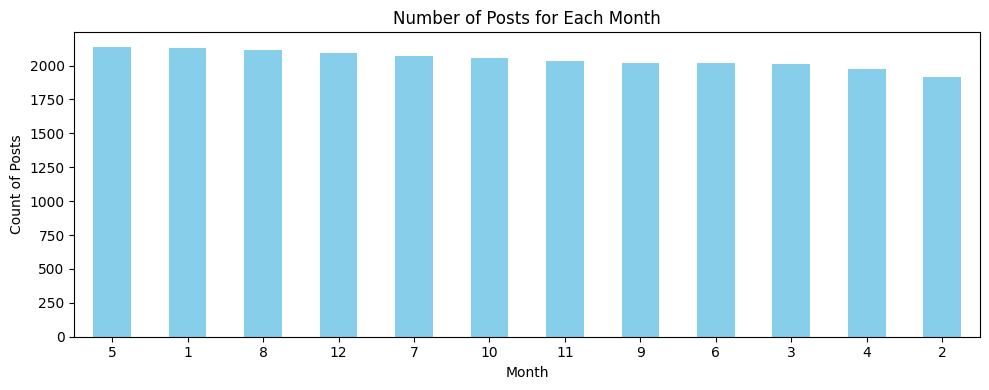

In [10]:
Dataset['Datetime'] = pd.to_datetime(Dataset['Datetime'], format='%d/%m/%y %H:%M')

Dataset['Month'] = Dataset['Datetime'].dt.month

monthly_counts = Dataset['Month'].value_counts().sort_values(ascending= False)

plt.figure(figsize=(10, 4))
monthly_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Posts for Each Month')
plt.xlabel('Month')
plt.ylabel('Count of Posts')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

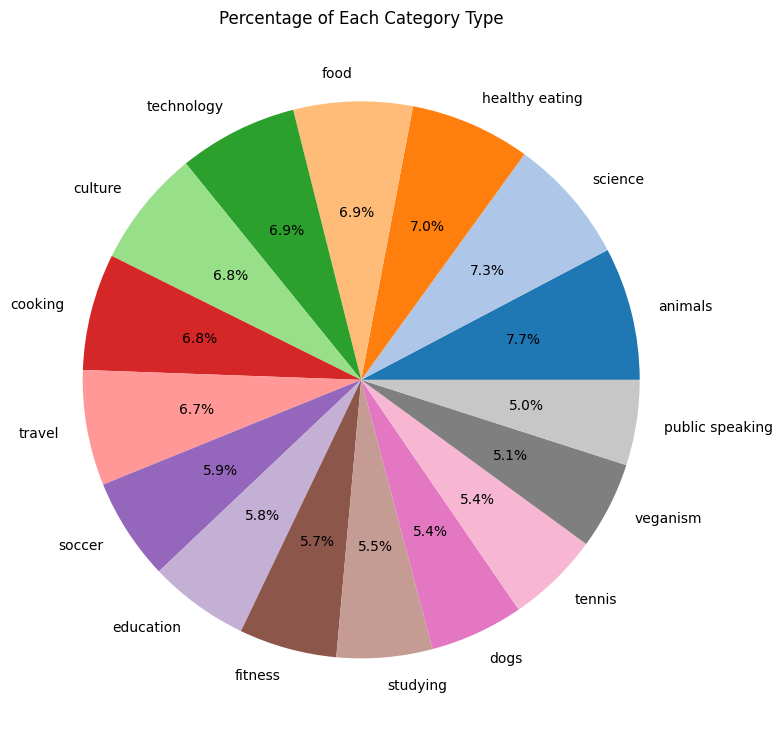

In [8]:
category_counts = Dataset['Category'].value_counts()

plt.figure(figsize=(8, 8))
category_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.tab20.colors)
plt.title('Percentage of Each Category Type')
plt.ylabel('')
plt.tight_layout()
plt.show()

<Figure size 1600x1200 with 0 Axes>

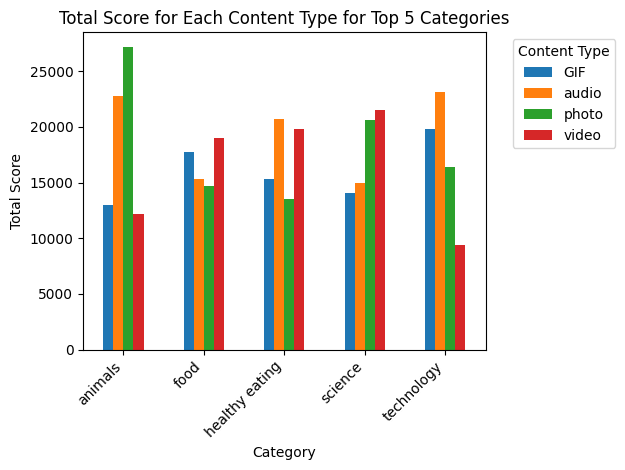

In [9]:
selected_categories = ['animals', 'science', 'healthy eating', 'technology', 'food']
Dataset_selected = Dataset[Dataset['Category'].isin(selected_categories)]
category_content_score = Dataset_selected.groupby(['Category', 'Content Type'])['Score'].sum().unstack(fill_value=0)

plt.figure(figsize=(16, 12))
category_content_score.plot(kind='bar')
plt.title('Total Score for Each Content Type for Top 5 Categories')
plt.xlabel('Category')
plt.ylabel('Total Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Content Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


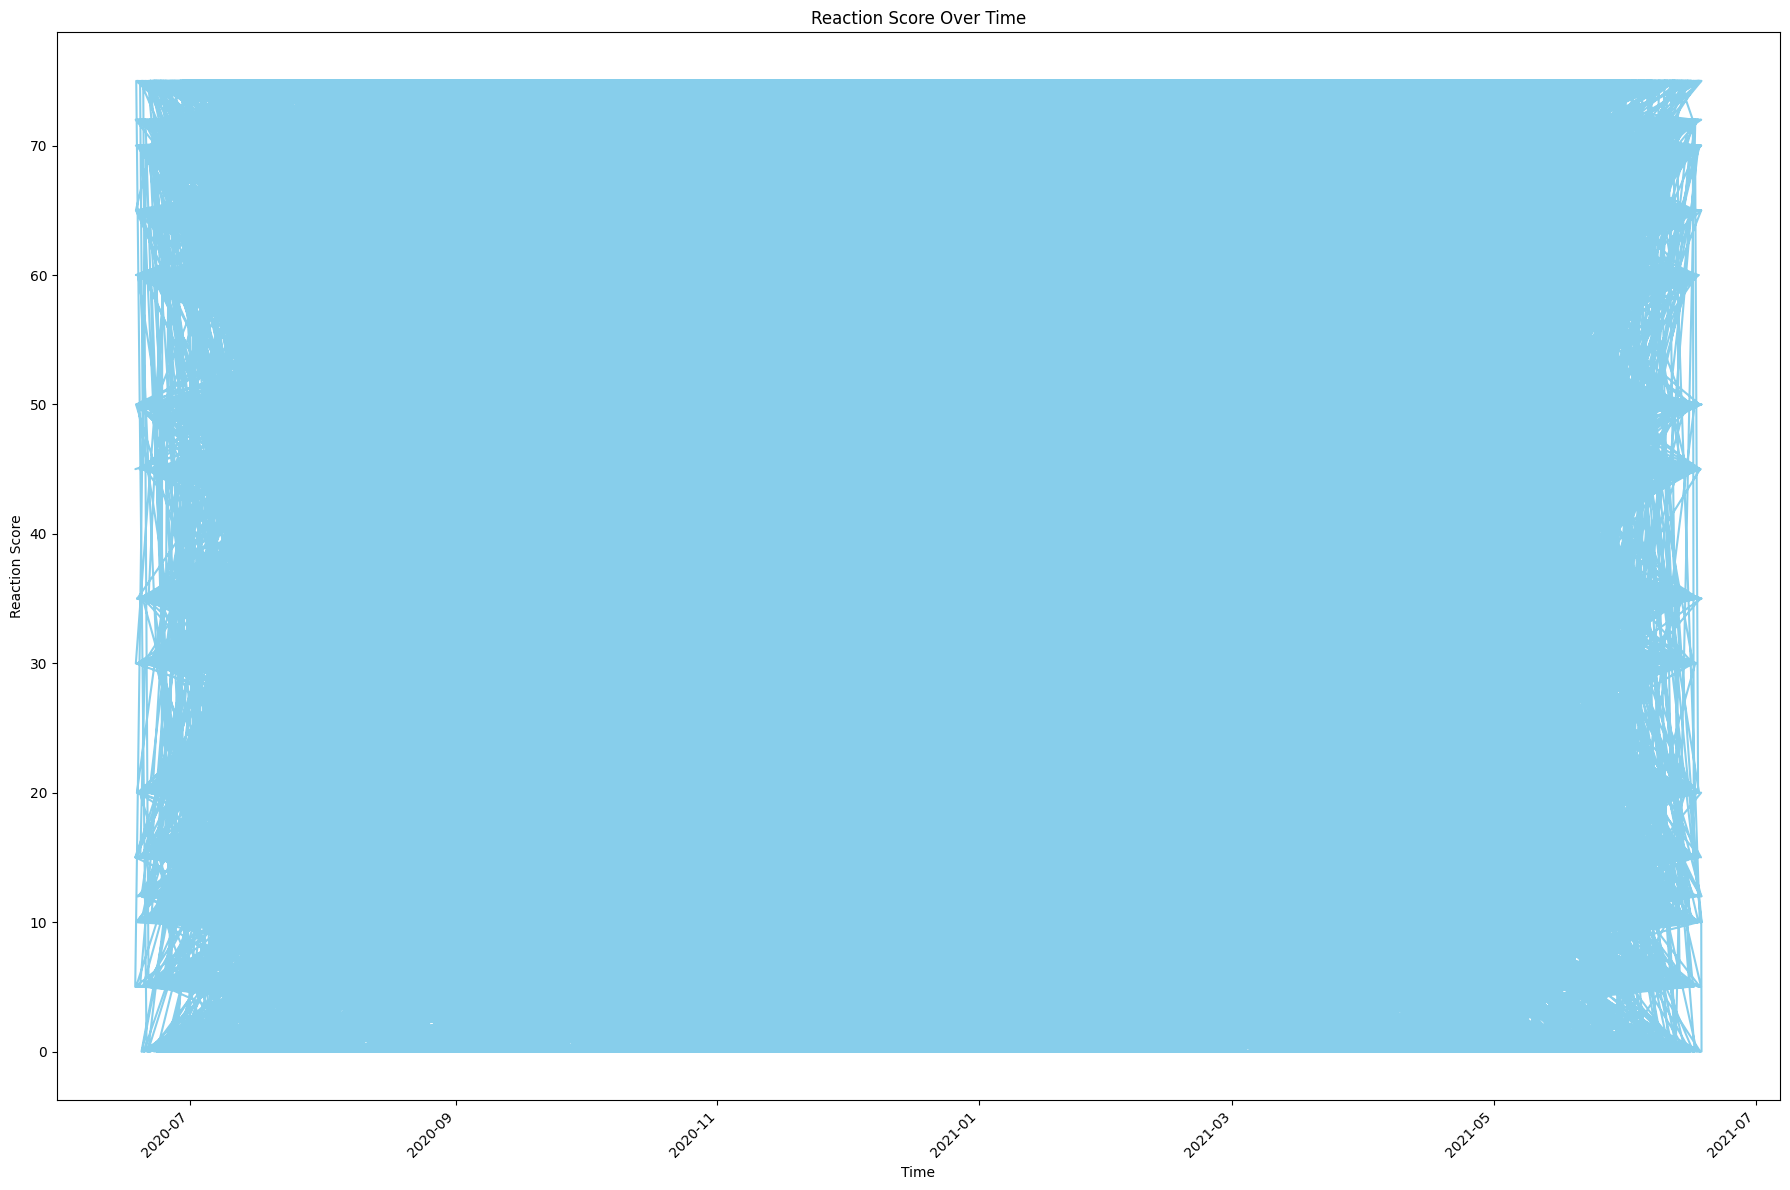

In [11]:
Dataset.set_index('Datetime', inplace=True)

plt.figure(figsize=(18, 12))
plt.plot(Dataset.index, Dataset['Score'], color='skyblue')
plt.title('Reaction Score Over Time')
plt.xlabel('Time')
plt.ylabel('Reaction Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()